# **Visualizations with : Seaborn | Matplotlib | Plotly**

## Required Libraries

In [2]:
# Import essential Python libraries

# If NumPy, Pandas, Matplotlib, Seaborn, or Plotly are not installed, you can install them using pip

import numpy as np  # Numerical computing library, useful for arrays and mathematical operations
import pandas as pd  # Data manipulation and analysis library, particularly for working with DataFrames

# Import visualization libraries
import matplotlib.pyplot as plt  # Core plotting library for static visualizations

# Ensures that plots are displayed inline within a Jupyter Notebook
%matplotlib inline  

import seaborn as sns  # Statistical data visualization library, built on top of Matplotlib, useful for complex plots

import plotly.express as px  # High-level Plotly interface for interactive plots
import plotly.graph_objects as go  # Lower-level interface for creating custom interactive plots

# Now you can use Matplotlib, Seaborn, and Plotly for both static and interactive visualizations.


## Data Cleaning (Also Getting Rough Ideas on the Data)

In [3]:
# Load the dataset
df = pd.read_csv('Customer Churn.csv')

# Display the first 5 rows of the dataset
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
# Listing the columns in the dataset
for i in (df.columns.values):
    print(i)

customerID
gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [4]:
# Display dataset summary, including data types, non-null counts, and memory usage
df.info()


# Displaying the DataFrame's metadata
df.info()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# - `df.info()` provides an overview of the dataset, including:
#   1️⃣ Number of **entries (rows)** in the dataset.
#   2️⃣ Number of **columns**.
#   3️⃣ **Column names** and their respective **data types** (int, float, object, etc.).
#   4️⃣ Number of **non-null values** per column (helps identify missing data).
#   5️⃣ The **memory usage** of the DataFrame (useful for performance optimization).
#
# 🔍 **Common Data Types in Pandas:**
# - `int64` → Integer values (e.g., customer ID, order count).
# - `float64` → Decimal values (e.g., revenue, percentage scores).
# - `object` → Text data (e.g., customer names, categories).
# - `bool` → Boolean values (True/False).
# - `datetime64` → Date/time values (e.g., subscription date).
#
# 🛠 **How to Use This Output?**
# ✅ Identify **missing values** (if non-null values < total rows).
# ✅ Detect **incorrect data types** (e.g., Amount stored as `object` instead of `int`).
# ✅ Check dataset **size** to optimize memory usage.
#
# 🚀 **Next Steps After `df.info()`:**
# - Handle missing values: `df.isnull().sum()`
# - Convert incorrect data types: `df['Amount'] = df['Amount'].astype(int)`
# - Optimize memory: `df.astype({'Category': 'category'})`


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# ------------------------------------------------
# 📝 Step 1: Handling Blank Values in 'TotalCharges'
# ------------------------------------------------
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0")

# 🔍 Why?
# - In some datasets, blank or missing values are stored as **empty strings (" ")** instead of NaN.
# - Since 'TotalCharges' should be numerical, replacing these blanks ensures uniformity.
# - The blank values indicate cases where **tenure is 0**, meaning no charges were recorded.

# ------------------------------------------------
# 📝 Step 2: Convert 'TotalCharges' to Float
# ------------------------------------------------
df["TotalCharges"] = df["TotalCharges"].astype("float")

# 🔍 Why?
# - Initially, 'TotalCharges' might be stored as `object` (string), preventing mathematical operations.
# - Converting it to `float` allows numerical analysis, such as:
#   ✅ Summing total revenue
#   ✅ Finding average charges per customer
#   ✅ Identifying trends in customer payments

# ------------------------------------------------
# 📝 Step 3: Verify Data Types and Missing Values
# ------------------------------------------------
df.info()

# 🔍 What This Shows:
# - Confirms that 'TotalCharges' is now a `float64` column.
# - Displays any remaining missing values.
# - Helps ensure dataset integrity before analysis.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# ------------------------------------------------
# 📝 Checking for Missing Values in the Dataset
# ------------------------------------------------
df.isnull().sum()

# 🔍 What This Does:
# - `df.isnull()` → Creates a DataFrame of the same shape as `df`, replacing:
#   ✅ `NaN` (missing values) with `True`
#   ✅ Non-missing values with `False`
# - `.sum()` → Counts the number of `True` (missing) values **for each column**.

# ------------------------------------------------
# 📝 Why Is This Important?
# ------------------------------------------------
# ✅ Helps identify columns with missing data.
# ✅ Guides data preprocessing decisions (e.g., filling missing values or dropping rows/columns).
# ✅ Ensures clean data for analysis and machine learning models.

# ------------------------------------------------
# 🛠 Possible Next Steps:
# ------------------------------------------------
# 1️⃣ **Drop missing values** (if few): 
#    df.dropna(inplace=True)
#
# 2️⃣ **Fill missing values** (if necessary):
#    - Replace with **mean** (for numerical data): df["Column"].fillna(df["Column"].mean(), inplace=True)
#    - Replace with **mode** (for categorical data): df["Column"].fillna(df["Column"].mode()[0], inplace=True)
#    - Replace with **zero or a fixed value**: df["Column"].fillna(0, inplace=True)
#
# 3️⃣ **Check dataset again after handling missing values:**
#    df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# ------------------------------------------------
# 📝 Summary Statistics for Numerical Columns
# ------------------------------------------------
df.describe()

# 🔍 What This Does:
# - `describe()` provides key **statistical insights** for numerical columns.
# - Includes:
#   ✅ **count** → Number of non-null values.
#   ✅ **mean** → Average value.
#   ✅ **std (standard deviation)** → Spread of the data.
#   ✅ **min & max** → Minimum and maximum values.
#   ✅ **25%, 50%, 75% (quartiles)** → Percentile-based distribution.
#
# ------------------------------------------------
# 📝 Why Is This Important?
# ------------------------------------------------
# ✅ **Detects outliers** → Unusually high or low values.
# ✅ **Checks data distribution** → Symmetric, skewed, or missing key statistics.
# ✅ **Identifies potential data issues** → Unexpected values or incorrect data types.
# ✅ **Supports data preprocessing** → Normalization, scaling, and feature selection.

# ------------------------------------------------
# 🛠 Additional Insights:
# ------------------------------------------------
# 📌 **For categorical columns:** Use df.describe(include='object')
# 📌 **For all columns (including categorical):** Use df.describe(include='all')
# 📌 **To check unique values in a column:** df['Column'].nunique()

# ------------------------------------------------
# 🚀 Next Steps:
# ------------------------------------------------
# 1️⃣ Visualize data distribution (e.g., histograms, box plots)
# 2️⃣ Identify & handle outliers
# 3️⃣ Standardize or normalize data for analysis
# 4️⃣ Proceed with exploratory data analysis (EDA)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
# ------------------------------------------------
# 📝 Checking for Duplicate Customer IDs
# ------------------------------------------------

df["customerID"].duplicated().sum()

# 🔍 What This Does:
# - `df["customerID"].duplicated()` → Returns a Series of **True/False** values:
#   ✅ `True` → If a duplicate exists (i.e., a repeated customer ID).
#   ✅ `False` → If the value is unique.
# - `.sum()` → Counts the number of `True` values (i.e., the number of duplicate customer IDs).

# ------------------------------------------------
# 📝 Why Is This Important?
# ------------------------------------------------
# ✅ Ensures data integrity → Customer IDs should be **unique**.
# ✅ Detects **data entry errors** or **duplicate records**.
# ✅ Prevents issues in customer-based analytics (e.g., wrong calculations of retention or churn rates).

# ------------------------------------------------
# 🛠 Possible Next Steps:
# ------------------------------------------------
# 1️⃣ **Find the actual duplicate rows:**
#    df[df["customerID"].duplicated(keep=False)]
#
# 2️⃣ **Remove duplicate customer IDs (if needed):**
#    df.drop_duplicates(subset="customerID", keep="first", inplace=True)
#
# 3️⃣ **Verify again after removal:**
#    df["customerID"].duplicated().sum()


0

In [13]:
# ------------------------------------------------
# 📝 Step 1: Define a Function to Convert Values
# ------------------------------------------------
def conv(value):
    if value == 1:
        return "yes"  # Convert 1 to 'yes'
    else:
        return "no"   # Convert 0 to 'no'

# ------------------------------------------------
# 📝 Step 2: Apply the Function to the 'SeniorCitizen' Column
# ------------------------------------------------
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

df.head()

# 🔍 What This Does:
# - The `apply()` function applies `conv()` **to each value** in the 'SeniorCitizen' column.
# - Converts:
#   ✅ `1` → "yes"
#   ✅ `0` → "no"
# - Makes the column **easier to interpret** for analysis and visualization.

# ------------------------------------------------
# 📝 Why Is This Important?
# ------------------------------------------------
# ✅ Improves data readability.
# ✅ Helps in visualizing senior citizen demographics.
# ✅ Prepares data for categorical analysis (e.g., using bar charts or pivot tables).
# ✅ Useful for **customer segmentation** and **churn analysis**.

# ------------------------------------------------
# 🚀 Next Steps:
# ------------------------------------------------
# 1️⃣ **Check the column transformation:**
#    df['SeniorCitizen'].value_counts()
#
# 2️⃣ **Convert the column to a categorical data type** (if needed):
#    df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')
#
# 3️⃣ **Visualize senior citizen distribution:**
#    sns.countplot(data=df, x='SeniorCitizen')
#    plt.title('Senior Citizen Distribution')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Performing : Exploratory Data Analysis (EDA)


```

# -------------------------------------------
# 📝 Exploratory Data Analysis (EDA) Overview:
# -------------------------------------------
# - EDA is the process of analyzing datasets to summarize their key characteristics 
#   using statistical and visualization techniques.
# - It helps identify patterns, detect outliers, and understand relationships between variables.
# - EDA is crucial before applying machine learning models to ensure data quality and relevance.

# -------------------------------------------
# 🔍 Key Steps in EDA:
# -------------------------------------------
# 1️⃣ **Data Collection**: Gathering raw data from various sources like databases, APIs, or CSV files.
# 2️⃣ **Data Cleaning**: Handling missing values, removing duplicates, and correcting inconsistencies.
# 3️⃣ **Data Types & Structure Check**: Verifying column data types (numerical, categorical, datetime).
# 4️⃣ **Descriptive Statistics**: Using measures like mean, median, mode, variance, and standard deviation.
# 5️⃣ **Data Visualization**: Creating plots (histograms, scatter plots, box plots) to understand distributions.
# 6️⃣ **Correlation Analysis**: Checking relationships between numerical variables (using correlation matrix).
# 7️⃣ **Feature Engineering**: Creating new relevant features to improve model performance.
# 8️⃣ **Outlier Detection**: Identifying anomalies using box plots, IQR, or Z-score.
# 9️⃣ **Data Transformation**: Scaling, normalizing, or encoding categorical variables.
# 🔟 **Final Insights & Reporting**: Summarizing findings for decision-making.

# -------------------------------------------
# 📊 Key Performance Indicators (KPIs) in Data Analytics:
# -------------------------------------------
# - **KPIs** are measurable values that indicate the success of a business or data-driven objective.

# 🔹 **Common KPIs in Business & Data Analytics:**
# - **Customer-related KPIs**:
#   - Customer Acquisition Cost (CAC): Cost to acquire a new customer.
#   - Customer Lifetime Value (CLV): Predicted revenue from a customer over time.
#   - Churn Rate: Percentage of customers who stop using a service.

# - **Sales & Revenue KPIs**:
#   - Revenue Growth Rate: Percentage increase in revenue over a period.
#   - Conversion Rate: Percentage of users who take a desired action (e.g., purchase).
#   - Average Order Value (AOV): Average value per order.

# - **Operational KPIs**:
#   - Inventory Turnover: Number of times inventory is sold and replaced.
#   - Lead Time: Time taken from order placement to delivery.
#   - First Call Resolution (FCR): Percentage of customer issues resolved in the first interaction.

# - **Data & Model Performance KPIs**:
#   - Accuracy: Correct predictions out of total predictions (for classification models).
#   - Precision & Recall: Measures of model reliability (important in imbalanced datasets).
#   - F1 Score: Harmonic mean of precision and recall.
#   - Mean Absolute Error (MAE) & Mean Squared Error (MSE): Measures of error in regression models.

# -------------------------------------------
# 🔢 Other Key Terms in Data Analytics:
# -------------------------------------------
# - **Descriptive Analytics**: Summarizes past data to understand what happened.
# - **Predictive Analytics**: Uses statistical models to predict future trends.
# - **Prescriptive Analytics**: Suggests actions based on predictive insights.
# - **Data Wrangling**: Cleaning and transforming raw data into a usable format.
# - **Data Governance**: Policies to manage data quality, security, and compliance.
# - **A/B Testing**: Comparing two versions of a variable (e.g., website layout) to determine effectiveness.
# - **ETL (Extract, Transform, Load)**: Process of collecting, cleaning, and storing data in databases.


```

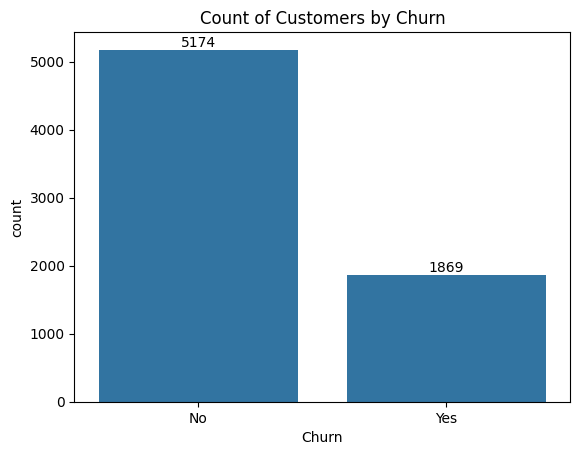

In [14]:
# ------------------------------------------------
# 📝 Seaborn: Countplot for Customer Churn
# ------------------------------------------------
ax = sns.countplot(x='Churn', data=df)  # Create a count plot for the 'Churn' column

ax.bar_label(ax.containers[0])  # Add labels on top of bars to show exact counts
plt.title("Count of Customers by Churn")  # Set the plot title
plt.show()  # Display the plot

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `sns.countplot(x='Churn', data=df)`: 
#    - Creates a **bar chart** showing the count of customers who churned vs. those who stayed.
#    - 'Churn' is a categorical variable (Yes/No), so countplot is ideal.
#
# ✅ `ax.bar_label(ax.containers[0])`: 
#    - Adds **labels** (counts) on top of each bar for better readability.
#
# ✅ `plt.title("Count of Customers by Churn")`: 
#    - Sets a **title** to clearly indicate the purpose of the chart.
#
# ✅ `plt.show()`: 
#    - Displays the chart.

# ------------------------------------------------
# 🚀 Next Step: Interactive Plotly Version
# ------------------------------------------------

# ------------------------------------------------
# 📝 Plotly: Interactive Countplot for Customer Churn
# ------------------------------------------------
fig = px.bar(df['Churn'].value_counts().reset_index(), 
             x='index',  # The churn categories (Yes/No)
             y='Churn',   # The count of each category
             text='Churn',  # Display the count as text on bars
             color='index',  # Color bars based on churn categories
             title="Count of Customers by Churn",  # Chart title
             labels={'index': 'Churn', 'Churn': 'Count'},  # Axis labels
             color_discrete_sequence=['#636EFA', '#EF553B'])  # Custom colors

fig.update_traces(textposition='outside')  # Place labels outside the bars
fig.update_layout(xaxis_title="Churn", yaxis_title="Count")  # Label axes

fig.show()  # Display the interactive chart

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `df['Churn'].value_counts().reset_index()`: 
#    - Counts occurrences of each 'Churn' category and resets the index for proper formatting.
#
# ✅ `px.bar(...)`: 
#    - Creates a **bar chart** using Plotly.
#    - `x='index'`: Represents the 'Yes' and 'No' churn categories.
#    - `y='Churn'`: Represents the **count** of each category.
#    - `text='Churn'`: Displays count values directly on the bars.
#    - `color='index'`: Uses different colors for 'Yes' and 'No' for better visualization.
#    - `title="Count of Customers by Churn"`: Sets the title.
#    - `labels={'index': 'Churn', 'Churn': 'Count'}`: Renames axes for clarity.
#
# ✅ `fig.update_traces(textposition='outside')`: 
#    - Moves count labels **outside** the bars for better readability.
#
# ✅ `fig.update_layout(...)`: 
#    - Adjusts axis labels for better clarity.
#
# ✅ `fig.show()`: 
#    - Displays the interactive Plotly chart.
#
# ------------------------------------------------
# 🚀 Why Use Plotly?
# ------------------------------------------------
# ✅ Interactive (hover effects, zooming, dynamic resizing)
# ✅ Easier to interpret when exploring large datasets
# ✅ Provides clear insights into customer churn trends


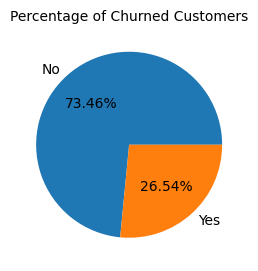

In [15]:
# ------------------------------------------------
# 📝 Seaborn/Matplotlib: Pie Chart for Churn Percentage
# ------------------------------------------------
plt.figure(figsize=(3,4))  # Set the figure size to 3x4 inches

# Group by 'Churn' and count occurrences
gb = df.groupby("Churn").agg({'Churn': "count"})

# Create a pie chart
plt.pie(gb['Churn'], 
        labels=gb.index,  # Labels for each category (Yes/No)
        autopct="%1.2f%%")  # Display percentage values with 2 decimal places

# Set the title of the pie chart
plt.title("Percentage of Churned Customers", fontsize=10)

# Display the pie chart
plt.show()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `df.groupby("Churn").agg({'Churn': "count"})`: 
#    - Groups data by 'Churn' and counts the number of customers in each category.
#
# ✅ `plt.pie(...)`: 
#    - Creates a pie chart from the grouped data.
#    - `labels=gb.index`: Uses 'Yes' and 'No' as labels.
#    - `autopct="%1.2f%%"`: Displays percentage values with **two decimal places**.
#
# ✅ `plt.title("Percentage of Churned Customers", fontsize=10)`: 
#    - Sets the title of the pie chart with font size 10.
#
# ✅ `plt.show()`: 
#    - Displays the chart.

# ------------------------------------------------
# 🚀 Next Step: Interactive Plotly Version
# ------------------------------------------------

# ------------------------------------------------
# 📝 Plotly: Interactive Pie Chart for Churn Percentage
# ------------------------------------------------
fig = px.pie(values=gb['Churn'],  # Pie chart values (customer count)
             names=gb.index,  # Labels ('Yes' and 'No')
             title="Percentage of Churned Customers",  # Chart title
             hole=0.3,  # Creates a donut-style chart (set to 0 for a full pie)
             color=gb.index,  # Different colors for 'Yes' and 'No'
             color_discrete_sequence=['#EF553B', '#636EFA'])  # Custom colors

fig.update_traces(textinfo='percent+label')  # Show both labels and percentage

fig.show()  # Display the interactive chart

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `px.pie(...)`: 
#    - Creates an **interactive pie chart** using Plotly.
#    - `values=gb['Churn']`: Uses customer count as pie segment size.
#    - `names=gb.index`: Labels each segment as 'Yes' or 'No'.
#    - `title="Percentage of Churned Customers"`: Sets the title.
#    - `hole=0.3`: Creates a **donut chart** (optional, set to 0 for a full pie).
#    - `color=gb.index`: Assigns different colors to each segment.
#    - `color_discrete_sequence=['#EF553B', '#636EFA']`: Custom colors for better readability.
#
# ✅ `fig.update_traces(textinfo='percent+label')`: 
#    - Displays both **percentage values** and **labels** on the chart.
#
# ✅ `fig.show()`: 
#    - Displays the interactive chart.

# ------------------------------------------------
# 🚀 Why Use Plotly?
# ------------------------------------------------
# ✅ Interactive (hover effects, zooming, detailed tooltips)
# ✅ Easier to interpret with labels and colors
# ✅ Better for presentations and dashboards


From the given pie chart we can conclude that 26.54% of our customers have churned out. 
Not let's explore the reason behind it

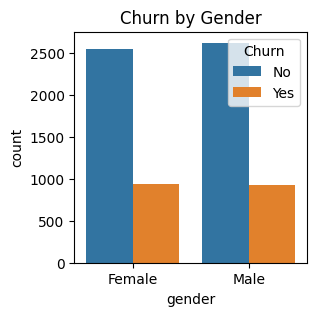

In [18]:
# ------------------------------------------------
# 📝 Seaborn/Matplotlib: Countplot for Churn by Gender
# ------------------------------------------------
plt.figure(figsize=(3,3))  # Set the figure size to 3x3 inches

# Create a countplot with 'gender' on the x-axis and Churn differentiation using hue
sns.countplot(x="gender", data=df, hue="Churn")

# Set the title of the plot
plt.title("Churn by Gender")

# Display the plot
plt.show()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `plt.figure(figsize=(3,3))`: 
#    - Defines the figure size (3x3 inches) for better readability.
#
# ✅ `sns.countplot(x="gender", data=df, hue="Churn")`: 
#    - Creates a bar chart where the **x-axis represents gender (Male/Female)**.
#    - The **y-axis represents the count of customers** in each gender category.
#    - The `hue="Churn"` argument splits each gender category into **Churned (Yes/No)**.
#
# ✅ `plt.title("Churn by Gender")`: 
#    - Sets the title of the plot.
#
# ✅ `plt.show()`: 
#    - Displays the visualization.

# ------------------------------------------------
# 🚀 Next Step: Interactive Plotly Version
# ------------------------------------------------

# ------------------------------------------------
# 📝 Plotly: Interactive Bar Chart for Churn by Gender
# ------------------------------------------------
fig = px.bar(df.groupby(["gender", "Churn"]).size().reset_index(name="Count"),  
             x="gender",  
             y="Count",  
             color="Churn",  
             title="Churn by Gender",  
             barmode="group",  # Groups the bars side by side
             color_discrete_sequence=['#636EFA', '#EF553B'])  # Custom colors

fig.update_layout(xaxis_title="Gender", yaxis_title="Count")  # Axis labels
fig.show()  # Display the interactive chart

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `df.groupby(["gender", "Churn"]).size().reset_index(name="Count")`: 
#    - Groups data by **Gender** and **Churn status**.
#    - Counts the number of occurrences in each category.
#
# ✅ `px.bar(...)`: 
#    - Creates an **interactive bar chart** using Plotly.
#    - `x="gender"`: Puts gender categories (Male/Female) on the x-axis.
#    - `y="Count"`: Puts the count of customers on the y-axis.
#    - `color="Churn"`: Differentiates Churn (Yes/No) using colors.
#    - `barmode="group"`: Places bars **side by side** for easy comparison.
#    - `color_discrete_sequence=['#636EFA', '#EF553B']`: Custom colors for clarity.
#
# ✅ `fig.update_layout(...)`: 
#    - Adds axis labels for better readability.
#
# ✅ `fig.show()`: 
#    - Displays the interactive bar chart.

# ------------------------------------------------
# 🚀 Why Use Plotly?
# ------------------------------------------------
# ✅ Interactive: Hover effects, tooltips, zooming, panning.
# ✅ Clear comparison of Churned vs Non-Churned for each gender.
# ✅ Useful for presentations and business analytics.


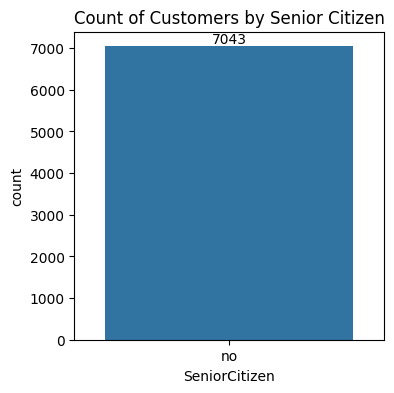

In [21]:
# ------------------------------------------------
# 📝 Seaborn/Matplotlib: Countplot for Senior Citizens
# ------------------------------------------------
plt.figure(figsize=(4,4))  # Set the figure size to 4x4 inches

# Create a countplot for the SeniorCitizen column
ax = sns.countplot(x="SeniorCitizen", data=df)

# Label bars with their respective counts
ax.bar_label(ax.containers[0])

# Set the title of the plot
plt.title("Count of Customers by Senior Citizen")

# Display the plot
plt.show()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `plt.figure(figsize=(4,4))`: 
#    - Sets the figure size to **4x4 inches** for better readability.
#
# ✅ `sns.countplot(x="SeniorCitizen", data=df)`: 
#    - Creates a **bar chart** where:
#      - The **x-axis represents whether a customer is a senior citizen ('Yes' or 'No')**.
#      - The **y-axis represents the count of customers** in each category.
#
# ✅ `ax.bar_label(ax.containers[0])`: 
#    - Adds labels on top of the bars to display the exact count.
#
# ✅ `plt.title("Count of Customers by Senior Citizen")`: 
#    - Sets the title for the plot.
#
# ✅ `plt.show()`: 
#    - Displays the visualization.

# ------------------------------------------------
# 🚀 Next Step: Interactive Plotly Version
# ------------------------------------------------

# ------------------------------------------------
# 📝 Plotly: Interactive Bar Chart for Senior Citizen Count
# ------------------------------------------------
fig = px.bar(df.groupby("SeniorCitizen").size().reset_index(name="Count"),  
             x="SeniorCitizen",  
             y="Count",  
             title="Count of Customers by Senior Citizen",  
             color="SeniorCitizen",  
             color_discrete_sequence=['#636EFA', '#EF553B'])  # Custom colors

fig.update_layout(xaxis_title="Senior Citizen (Yes/No)", yaxis_title="Count")  # Axis labels
fig.show()  # Display the interactive chart

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `df.groupby("SeniorCitizen").size().reset_index(name="Count")`: 
#    - Groups data by **SeniorCitizen** category ('Yes' or 'No').
#    - Counts the number of customers in each category.
#
# ✅ `px.bar(...)`: 
#    - Creates an **interactive bar chart** using Plotly.
#    - `x="SeniorCitizen"`: Puts **SeniorCitizen categories (Yes/No)** on the x-axis.
#    - `y="Count"`: Displays the **customer count** on the y-axis.
#    - `color="SeniorCitizen"`: Uses different colors for **'Yes' and 'No'**.
#    - `color_discrete_sequence=['#636EFA', '#EF553B']`: Defines custom colors.
#
# ✅ `fig.update_layout(...)`: 
#    - Adds axis labels for better understanding.
#
# ✅ `fig.show()`: 
#    - Displays the interactive bar chart.

# ------------------------------------------------
# 🚀 Why Use Plotly?
# ------------------------------------------------
# ✅ Interactive: Hover tooltips, zooming, and filtering.
# ✅ Clearly differentiates **Senior Citizens vs Non-Senior Citizens**.
# ✅ Useful for business insights and dashboard reporting.


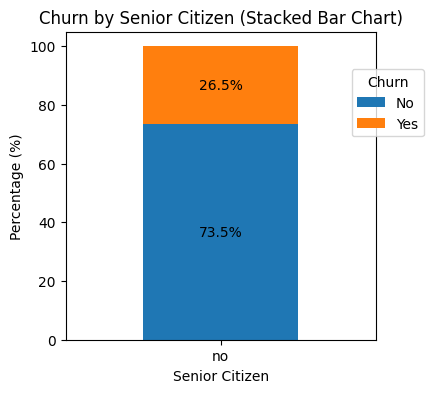

In [24]:
# ------------------------------------------------
# 📝 Seaborn/Matplotlib: Stacked Bar Chart for Churn by Senior Citizen
# ------------------------------------------------

# Calculate the percentage of Churn for Senior Citizens
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Create a figure and axis with a fixed size for better visualization
fig, ax = plt.subplots(figsize=(4, 4))

# Create a stacked bar chart
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Colors: Blue and Orange

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

# Title and labels
plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor=(0.9, 0.9))  # Customize legend position

# Show the plot
plt.show()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100`: 
#    - Groups data by **SeniorCitizen**.
#    - Counts the proportion of churn (`normalize=True`) and converts it to percentages (`* 100`).
#
# ✅ `total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])`: 
#    - Creates a **stacked bar chart**.
#    - Uses two colors to differentiate **Churned vs Not Churned customers**.
#
# ✅ `ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')`: 
#    - Adds percentage values inside the bars.
#
# ✅ `plt.legend(title='Churn', bbox_to_anchor=(0.9, 0.9))`: 
#    - Adds a legend to differentiate churn labels.

# ------------------------------------------------
# 🚀 Next Step: Interactive Plotly Version
# ------------------------------------------------

# ------------------------------------------------
# 📝 Plotly: Interactive Stacked Bar Chart for Churn by Senior Citizen
# ------------------------------------------------
fig = px.bar(
    total_counts.reset_index(),
    x="SeniorCitizen",
    y=["No", "Yes"],  # 'No' and 'Yes' represent Churn categories
    title="Churn by Senior Citizen (Stacked Bar Chart)",
    labels={"value": "Percentage (%)", "SeniorCitizen": "Senior Citizen"},
    barmode="stack",
    text_auto=".1f%%",  # Display percentages
    color_discrete_sequence=["#1f77b4", "#ff7f0e"]  # Set colors
)

# Update layout for better visualization
fig.update_layout(
    yaxis_title="Percentage (%)",
    xaxis_title="Senior Citizen",
    legend_title="Churn",
    bargap=0.1  # Reduce gap between bars
)

# Show interactive visualization
fig.show()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `px.bar(...)`:
#    - Creates an **interactive stacked bar chart** using Plotly.
#    - `x="SeniorCitizen"`: Puts **Senior Citizen categories** on the x-axis.
#    - `y=["No", "Yes"]`: Uses **Churn categories** as the stacked values.
#    - `barmode="stack"`: Ensures bars are **stacked on top of each other**.
#    - `text_auto=".1f%%"`: Displays **percentage values** on bars.
#    - `color_discrete_sequence=["#1f77b4", "#ff7f0e"]`: Defines **custom colors**.
#
# ✅ `fig.update_layout(...)`:
#    - Customizes **axis titles, legend title, and bar spacing**.
#
# ✅ `fig.show()`: 
#    - Displays the **interactive Plotly chart**.
#
# ------------------------------------------------
# 🚀 Why Use Plotly?
# ------------------------------------------------
# ✅ **Hover Tooltips**: See exact values by hovering over bars.
# ✅ **Interactive Features**: Click legend items to filter data.
# ✅ **Clearer Insights**: Makes it easier to analyze customer churn trends.


comparative a greater pecentage of people in senior citizen category have churned

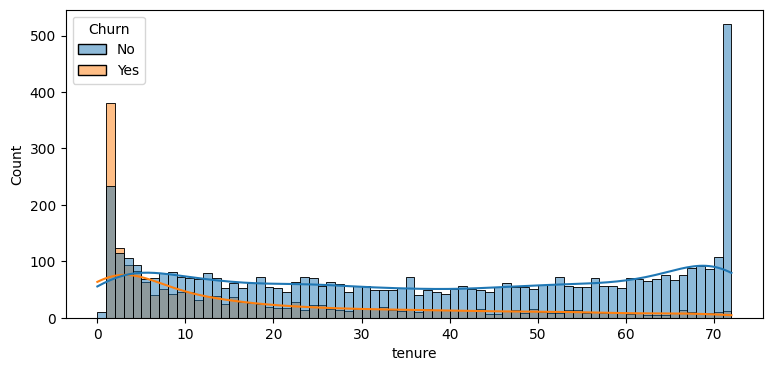

In [25]:
# ------------------------------------------------
# 📝 Seaborn/Matplotlib: Histogram for Tenure Distribution by Churn
# ------------------------------------------------

# Create a histogram to visualize the distribution of "tenure"
plt.figure(figsize=(9, 4))  # Set figure size for better visualization
sns.histplot(x="tenure", data=df, bins=72, hue="Churn", kde=True)  # Use 72 bins and add hue for Churn

# Show the plot
plt.show()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `sns.histplot(x="tenure", data=df, bins=72, hue="Churn", kde=True)`: 
#    - **x="tenure"**: Tenure (customer duration in months) is plotted on the x-axis.
#    - **bins=72**: Divides the tenure range into 72 segments for better granularity.
#    - **hue="Churn"**: Colors the bars based on the **Churn** column (Yes/No).
#    - **kde=True**: Adds a **KDE (Kernel Density Estimate)** curve for smooth distribution analysis.
#
# ✅ `plt.figure(figsize=(9,4))`: 
#    - Adjusts the figure size to **improve visibility**.

# ------------------------------------------------
# 🚀 Next Step: Interactive Plotly Version
# ------------------------------------------------

# ------------------------------------------------
# 📝 Plotly: Interactive Histogram for Tenure Distribution by Churn
# ------------------------------------------------
fig = px.histogram(
    df,
    x="tenure",
    color="Churn",
    nbins=72,  # Same bin count as Seaborn
    title="Tenure Distribution by Churn",
    labels={"tenure": "Tenure (Months)", "count": "Number of Customers"},
    barmode="overlay",  # Overlapping bars for better comparison
    opacity=0.7,  # Slight transparency to differentiate overlapping bars
    color_discrete_map={"Yes": "#FF5733", "No": "#3498DB"}  # Define custom colors
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Tenure (Months)",
    yaxis_title="Number of Customers",
    legend_title="Churn",
    bargap=0.05  # Reduce gaps between bars
)

# Show interactive visualization
fig.show()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `px.histogram(...)`:
#    - Creates an **interactive histogram** using Plotly.
#    - `x="tenure"`: Puts **tenure in months** on the x-axis.
#    - `color="Churn"`: Uses **Churn categories** for different colors.
#    - `nbins=72`: Ensures a **consistent bin count** with the Seaborn version.
#    - `barmode="overlay"`: Overlaps bars to **compare distributions better**.
#    - `opacity=0.7`: Makes bars **semi-transparent** for visibility.
#    - `color_discrete_map={"Yes": "#FF5733", "No": "#3498DB"}`:
#      - **Yes (Churned Customers)** → Orange-Red (#FF5733)
#      - **No (Non-Churned Customers)** → Blue (#3498DB)
#
# ✅ `fig.update_layout(...)`:
#    - Customizes **axis labels, legend, and bar gaps**.
#
# ✅ `fig.show()`: 
#    - Displays the **interactive Plotly chart**.

# ------------------------------------------------
# 🚀 Why Use Plotly?
# ------------------------------------------------
# ✅ **Hover Tooltips**: See exact values by hovering over bars.
# ✅ **Interactive Filtering**: Click legend items to filter churned vs non-churned customers.
# ✅ **Smooth Visualization**: Helps in analyzing customer tenure trends easily.


people who have used our services for a long time have stayed and people who have used our sevices 

1 or 2 months  have churned

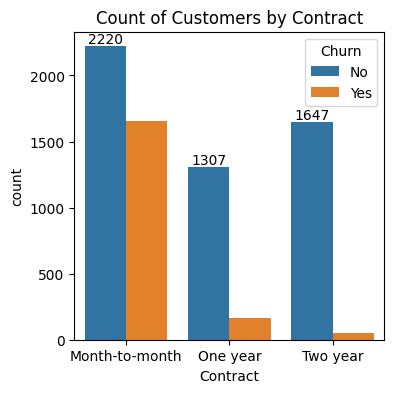

In [26]:
# ------------------------------------------------
# 📝 Seaborn/Matplotlib: Countplot for Contract Type vs Churn
# ------------------------------------------------

# Set figure size for better visualization
plt.figure(figsize=(4, 4))

# Create a count plot to show the distribution of contract types with churn information
ax = sns.countplot(x="Contract", data=df, hue="Churn")

# Add data labels on the bars
ax.bar_label(ax.containers[0])

# Set title for the plot
plt.title("Count of Customers by Contract")

# Show the plot
plt.show()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `sns.countplot(x="Contract", data=df, hue="Churn")`:
#    - **x="Contract"**: Displays different contract types on the x-axis.
#    - **hue="Churn"**: Differentiates the bars based on **Churn (Yes/No)**.
#    - This helps in understanding which contract type has **higher churn rates**.
#
# ✅ `ax.bar_label(ax.containers[0])`: 
#    - Adds **numeric labels** on top of the bars to show exact counts.
#
# ✅ `plt.figure(figsize=(4,4))`:
#    - Adjusts **figure size** for better clarity.
#
# ✅ `plt.title("Count of Customers by Contract")`: 
#    - Sets a **descriptive title** for the visualization.

# ------------------------------------------------
# 🚀 Next Step: Interactive Plotly Version
# ------------------------------------------------

# ------------------------------------------------
# 📝 Plotly: Interactive Countplot for Contract Type vs Churn
# ------------------------------------------------
fig = px.histogram(
    df, 
    x="Contract", 
    color="Churn", 
    title="Count of Customers by Contract Type",
    labels={"Contract": "Contract Type", "count": "Number of Customers"},
    barmode="group",  # Grouped bars for better comparison
    text_auto=True,  # Show data labels on bars
    color_discrete_map={"Yes": "#FF5733", "No": "#3498DB"}  # Define custom colors
)

# Update layout for better visualization
fig.update_layout(
    xaxis_title="Contract Type",
    yaxis_title="Number of Customers",
    legend_title="Churn",
    bargap=0.2  # Slight gap between bars for clarity
)

# Show interactive visualization
fig.show()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `px.histogram(...)`:
#    - Creates an **interactive bar chart**.
#    - `x="Contract"`: Displays different **contract types** on the x-axis.
#    - `color="Churn"`: Differentiates bars based on **Churn (Yes/No)**.
#    - `barmode="group"`: Places bars **side by side** for easy comparison.
#    - `text_auto=True`: **Displays exact counts** on the bars.
#    - `color_discrete_map={"Yes": "#FF5733", "No": "#3498DB"}`:
#      - **Yes (Churned Customers)** → Orange-Red (#FF5733)
#      - **No (Non-Churned Customers)** → Blue (#3498DB)
#
# ✅ `fig.update_layout(...)`:
#    - Adjusts **axis labels, legend, and bar spacing** for better clarity.
#
# ✅ `fig.show()`: 
#    - Displays the **interactive Plotly visualization**.

# ------------------------------------------------
# 🚀 Why Use Plotly?
# ------------------------------------------------
# ✅ **Hover Tooltips**: See exact values by hovering over bars.
# ✅ **Interactive Filtering**: Click legend items to filter churned vs non-churned customers.
# ✅ **Better Readability**: Grouped bars help in easy visual comparison.


people who have month to month contract are likely to churn then from those who have 1 or 2 years or contract. 

In [31]:
# Printing the Column Names For Necessary Work
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

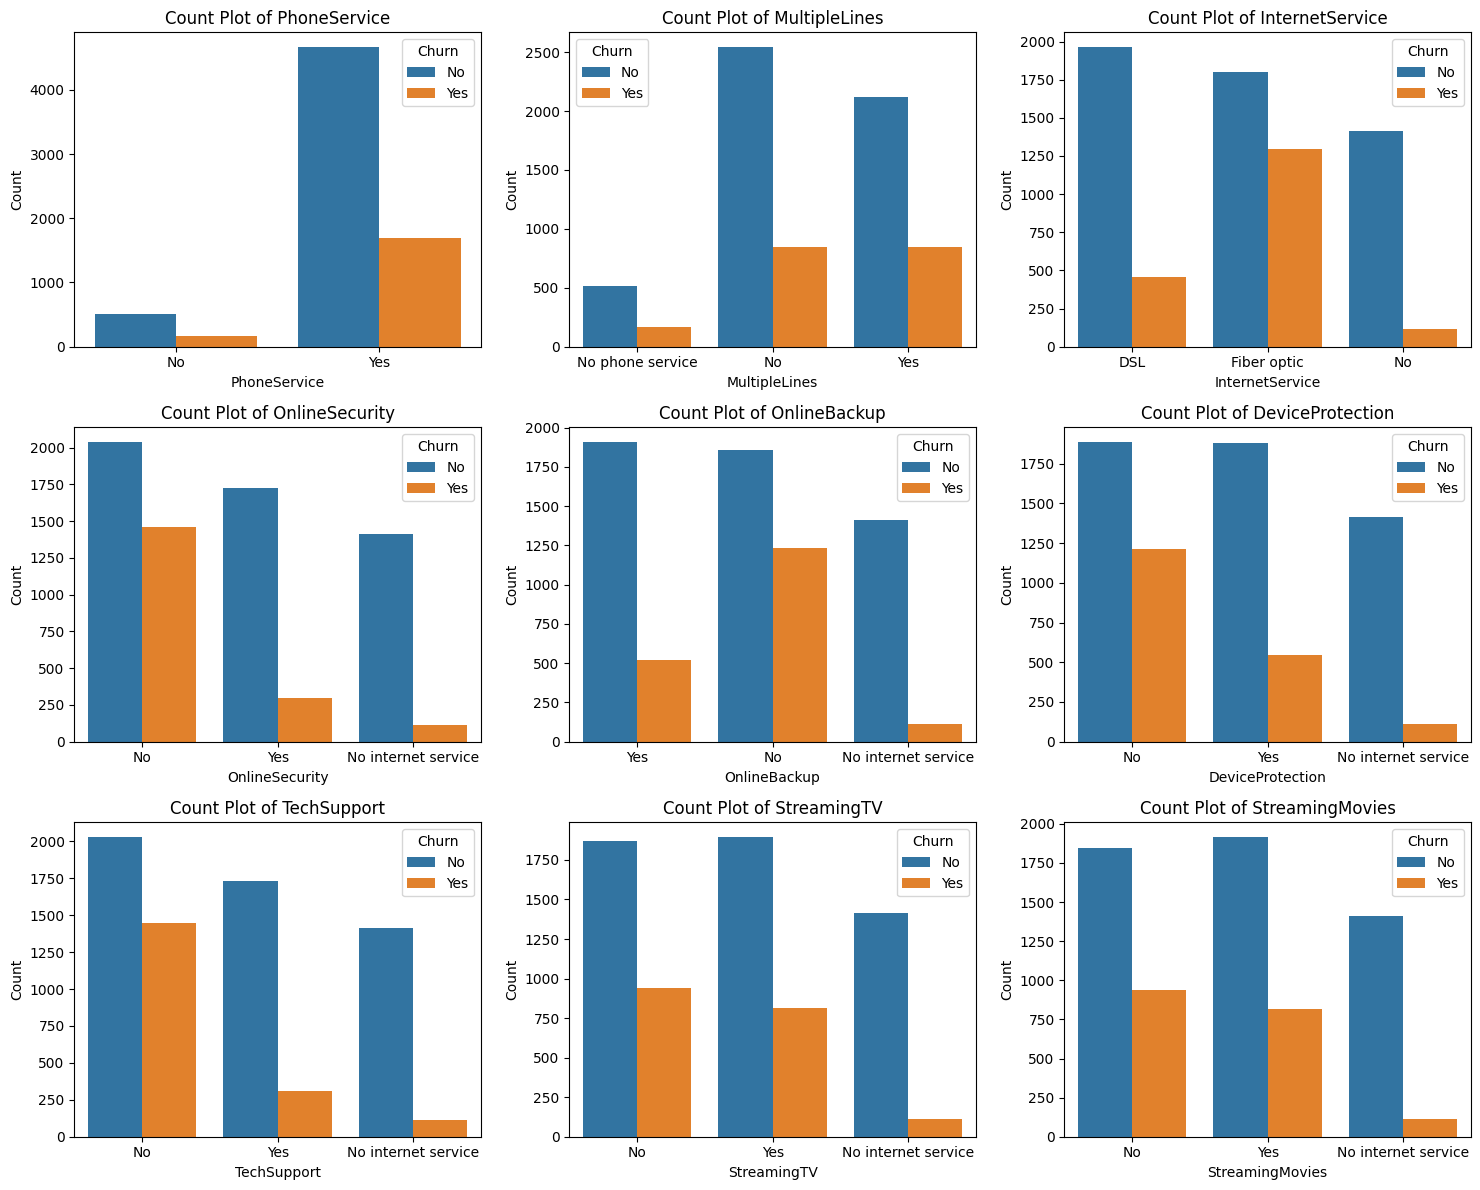

In [32]:
# ------------------------------------------------
# 📝 Seaborn/Matplotlib: Count Plots for Multiple Service-Related Columns vs Churn
# ------------------------------------------------

# Define the columns to visualize
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid
n_cols = 3  # 3 columns per row
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate required rows

# Create subplots with dynamic row count
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figure size dynamically

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over columns and create count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"])  # Count plot with churn hue
    axes[i].set_title(f'Count Plot of {col}')  # Set title for each subplot
    axes[i].set_xlabel(col)  # Set x-axis label
    axes[i].set_ylabel('Count')  # Set y-axis label

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])  # Delete extra axes if they exist

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `columns`: List of service-related columns to analyze.
# ✅ `n_cols = 3`: Creates 3 plots per row for readability.
# ✅ `n_rows`: Dynamically calculates the number of rows required based on the number of columns.
# ✅ `fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))`: 
#    - Creates a grid of subplots with appropriate figure size.
# ✅ `axes = axes.flatten()`: Flattens the subplot array for easy looping.
# ✅ `sns.countplot(x=col, data=df, ax=axes[i], hue=df["Churn"])`: 
#    - Creates a count plot for each service-related column.
#    - `hue="Churn"` differentiates churned and non-churned customers.
# ✅ `fig.delaxes(axes[j])`: Removes any extra unused subplots.
# ✅ `plt.tight_layout()`: Ensures plots do not overlap.

# ------------------------------------------------
# 🚀 Next Step: Interactive Plotly Version
# ------------------------------------------------

# ------------------------------------------------
# 📝 Plotly: Interactive Subplots for Service-Related Columns vs Churn
# ------------------------------------------------
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create subplots dynamically
fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=columns)

# Track subplot position
row, col = 1, 1

# Iterate over service-related columns and add bar charts
for i, column in enumerate(columns):
    churn_counts = df.groupby([column, "Churn"]).size().reset_index(name="Count")
    
    for churn_value in df["Churn"].unique():
        subset = churn_counts[churn_counts["Churn"] == churn_value]
        fig.add_trace(
            go.Bar(
                x=subset[column],
                y=subset["Count"],
                name=f"{column} - Churn {churn_value}",
                marker_color="#FF5733" if churn_value == "Yes" else "#3498DB"
            ),
            row=row, col=col
        )

    # Update row & col tracking for next subplot
    col += 1
    if col > n_cols:
        row += 1
        col = 1

# Update layout for better readability
fig.update_layout(
    title_text="Service Usage vs Churn (Interactive Subplots)",
    showlegend=False,
    height=n_rows * 300,  # Adjust height dynamically
    width=1000
)

# Show interactive plot
fig.show()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `make_subplots(rows=n_rows, cols=n_cols, subplot_titles=columns)`: 
#    - Creates a subplot grid dynamically based on the number of service columns.
# ✅ `df.groupby([column, "Churn"]).size().reset_index(name="Count")`: 
#    - Groups data by each service type and churn status.
# ✅ `go.Bar(...)`:
#    - Creates bar charts for each category.
#    - `marker_color`: Colors churned customers **(Orange-Red)** and non-churned customers **(Blue)**.
# ✅ `fig.add_trace(...)`: 
#    - Adds the generated bars to respective subplots.
# ✅ `showlegend=False`: 
#    - Hides redundant legends for a cleaner look.
# ✅ `fig.show()`: 
#    - Displays the interactive Plotly visualization.

# ------------------------------------------------
# 🚀 Why Use Plotly?
# ------------------------------------------------
# ✅ **Interactive Hover Tooltips**: Get details on hover.
# ✅ **Better Comparisons**: Compare service usage vs churn dynamically.
# ✅ **Scalability**: Handles multiple service-related columns efficiently.


The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. 

For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable. 

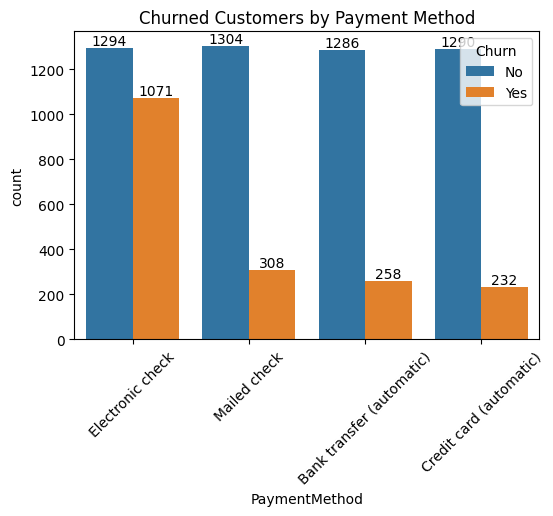

In [33]:
# ------------------------------------------------
# 📝 Seaborn/Matplotlib: Churned Customers by Payment Method
# ------------------------------------------------

# Set figure size
plt.figure(figsize=(6,4))

# Create a count plot with Churn as hue
ax = sns.countplot(x="PaymentMethod", data=df, hue="Churn")

# Add bar labels for both churn categories
ax.bar_label(ax.containers[0])  # Non-Churned Customers
ax.bar_label(ax.containers[1])  # Churned Customers

# Set title and rotate x-axis labels for readability
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation=45)

# Show the plot
plt.show()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `plt.figure(figsize=(6,4))`: Sets the figure size for better visualization.
# ✅ `sns.countplot(x="PaymentMethod", data=df, hue="Churn")`: 
#    - Creates a count plot for different payment methods.
#    - Uses `hue="Churn"` to differentiate between churned and non-churned customers.
# ✅ `ax.bar_label(ax.containers[0]) & ax.bar_label(ax.containers[1])`: 
#    - Adds labels to bars for better readability.
# ✅ `plt.xticks(rotation=45)`: Rotates x-axis labels for better visibility.
# ✅ `plt.show()`: Displays the visualization.

# ------------------------------------------------
# 🚀 Next Step: Interactive Plotly Version
# ------------------------------------------------

# ------------------------------------------------
# 📝 Plotly: Interactive Bar Chart for Churn by Payment Method
# ------------------------------------------------
import plotly.express as px

# Create a grouped bar chart using Plotly
fig = px.bar(
    df.groupby(["PaymentMethod", "Churn"]).size().reset_index(name="Count"),
    x="PaymentMethod",
    y="Count",
    color="Churn",
    barmode="group",
    text="Count",  # Display counts on bars
    color_discrete_map={"Yes": "#FF5733", "No": "#3498DB"}  # Custom colors
)

# Update layout for better readability
fig.update_layout(
    title="Churned Customers by Payment Method (Interactive)",
    xaxis_title="Payment Method",
    yaxis_title="Count",
    xaxis_tickangle=-45,  # Rotate x-axis labels for readability
    height=500,
    width=700
)

# Show interactive plot
fig.show()

# ------------------------------------------------
# 📝 Explanation:
# ------------------------------------------------
# ✅ `df.groupby(["PaymentMethod", "Churn"]).size().reset_index(name="Count")`: 
#    - Groups data by payment method and churn status.
# ✅ `px.bar(...)`: 
#    - Creates an interactive bar chart.
#    - `barmode="group"` places churned and non-churned customers side by side.
# ✅ `color_discrete_map={"Yes": "#FF5733", "No": "#3498DB"}`: 
#    - Assigns colors (Orange-Red for churned, Blue for non-churned).
# ✅ `text="Count"`: 
#    - Displays count values directly on the bars.
# ✅ `fig.update_layout(...)`: 
#    - Adjusts title, labels, and layout for better readability.
# ✅ `fig.show()`: 
#    - Displays the interactive visualization.

# ------------------------------------------------
# 🚀 Why Use Plotly?
# ------------------------------------------------
# ✅ **Interactive Hover Tooltips**: Get details on hover.
# ✅ **Better Comparison**: Easier to differentiate churned customers across payment methods.
# ✅ **Scalability**: Handles more data points without clutter.


# CONCLUSION

## *Customer is likely to churn when he is using electronic check as a payment method.* 